## Bike Sharing Demand

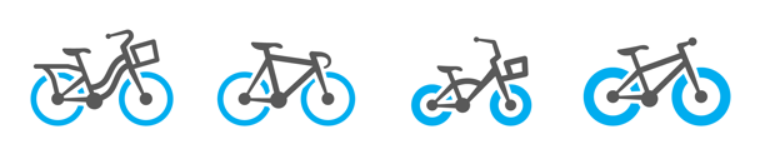

Data Fields from [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)

### Description

- datetime : hourly date + timestamp  
- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday : whether the day is considered a holiday
- workingday : whether the day is neither a weekend nor holiday
- weather : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

### Evaluation

by Root Mean Squared Logarithmic Error (RMSLE)

[RMSLSE](https://www.slideshare.net/KhorSoonHin/rmsle-cost-function)

과대평가 된 항목보다는 과소평가 된 항목에 페널티를 준다.
오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을 수록 정밀도가 높다.
0에 가까운 값이 나올수록 정밀도가 높은 것이다.

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ggplot 스타일
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트가 깨지는 문제를 위해
mpl.rcParams['axes.unicode_minus'] = False

# 한글 보이게 하기 위함.

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# train 데이터 불러오기
train = pd.read_csv('data/bike_train.csv', parse_dates= ['datetime'])
print(train.shape)

train.head() 

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


parse_dates = ['datetime']으로 불러오면 데이터 형식을 datetime으로 불러옴

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
# 기초통계량
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

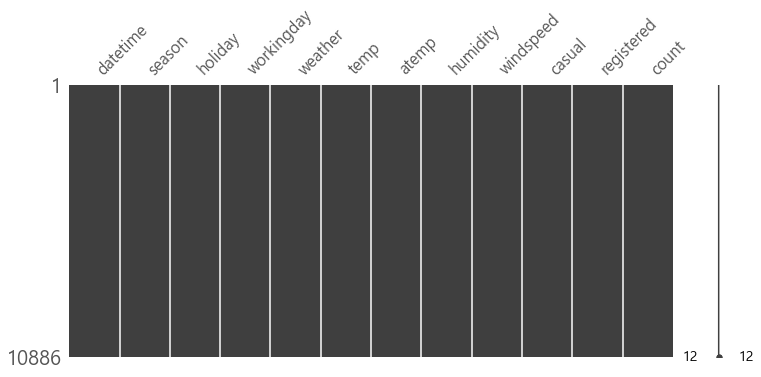

In [6]:
import missingno as msno

msno.matrix(train, figsize = (12,5))
plt.show()

In [7]:
# 시간에 대한 파생변수 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print('파생변수 생성 후 train shape: ',train.shape)

파생변수 생성 후 train shape:  (10886, 18)


In [8]:
train.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
9072,2012-09-01 09:00:00,3,0,0,2,31.16,35.605,58,12.998,62,175,237,2012,9,1,9,0,0


## EDA

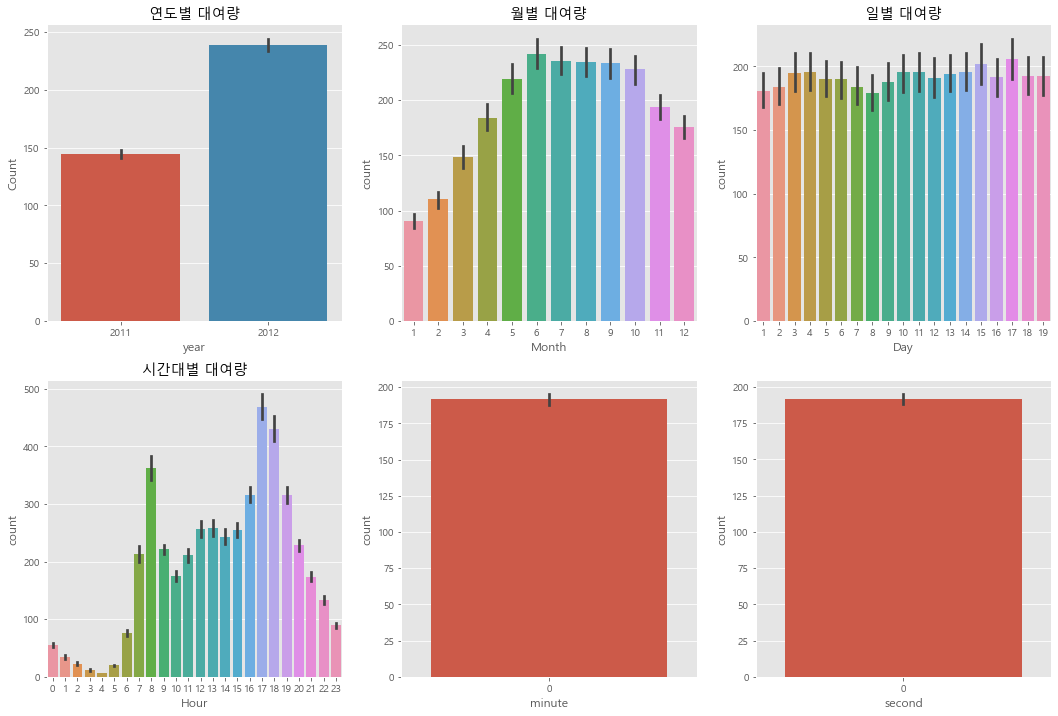

In [9]:
# 시간대별 대여량
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols =3)
figure.set_size_inches(18,12)

sns.barplot(data = train, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'hour', y = 'count', ax = ax4)
sns.barplot(data = train, x = 'minute', y = 'count', ax = ax5)
sns.barplot(data = train, x = 'second', y = 'count', ax = ax6)

ax1.set(ylabel = 'Count', title = '연도별 대여량')
ax2.set(xlabel = 'Month', title = '월별 대여량')
ax3.set(xlabel = 'Day', title = '일별 대여량')
ax4.set(xlabel = 'Hour', title = '시간대별 대여량')
plt.show()

- 연도별 대여량은 2011년보다 2012년이 더 많다.
- 월별 대여량은 6월이 가장 많고, 7-10월도 많다. 겨울에는 상대적으로 대여량이 적다.
- 일별 대여량은 19일까지 있다. 나머지 일수는 test셋에 있으므로 이 feature는 사용할 수 없다.
- 시간대별 대여량은 출퇴근 시간이 많다. 하지만 주말과 나누어 볼 필요성이 있다.
- 분,초는 모두 0이므로 유의한 feature가 아니다.

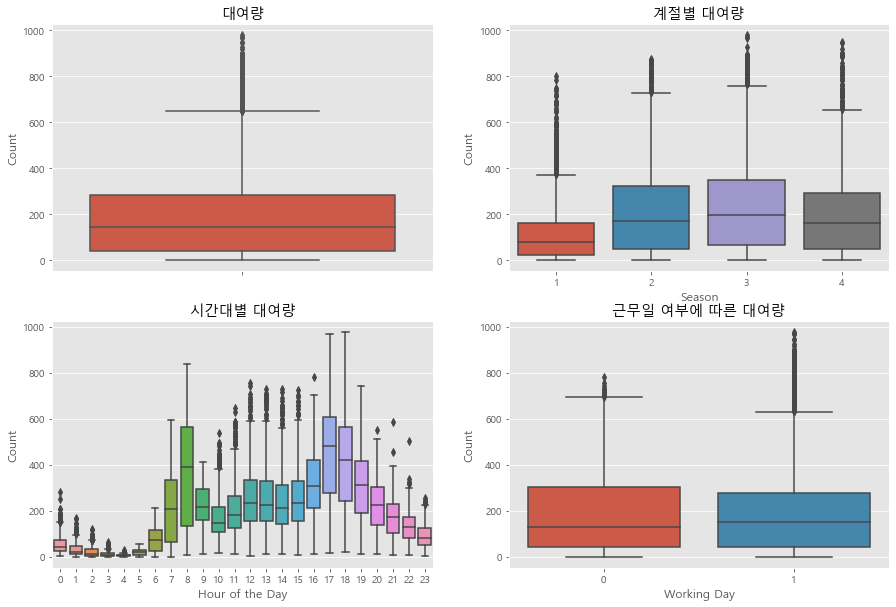

In [10]:
# 박스플롯
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15,10)

sns.boxplot(data = train, y = 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = train, y = 'count', x = 'season', orient = 'v', ax = axes[0][1])
sns.boxplot(data = train, y = 'count', x = 'hour', orient = 'v', ax = axes[1][0])
sns.boxplot(data = train, y = 'count', x = 'workingday', orient = 'v', ax = axes[1][1])

axes[0][0].set(ylabel = 'Count', title = '대여량')
axes[0][1].set(xlabel = 'Season', ylabel = 'Count', title = '계절별 대여량')
axes[1][0].set(xlabel = 'Hour of the Day', ylabel = 'Count', title = '시간대별 대여량')
axes[1][1].set(xlabel = 'Working Day', ylabel  ='Count', title = '근무일 여부에 따른 대여량')
plt.show()

In [11]:
# 요일별
train['dayofweek'] = train['datetime'].dt.dayofweek
train.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
2991,2011-07-13 13:00:00,3,0,1,3,33.62,37.88,46,8.9981,39,119,158,2011,7,13,13,0,0,2


In [12]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

0부터 6까지 월-일순으로 되어있다.

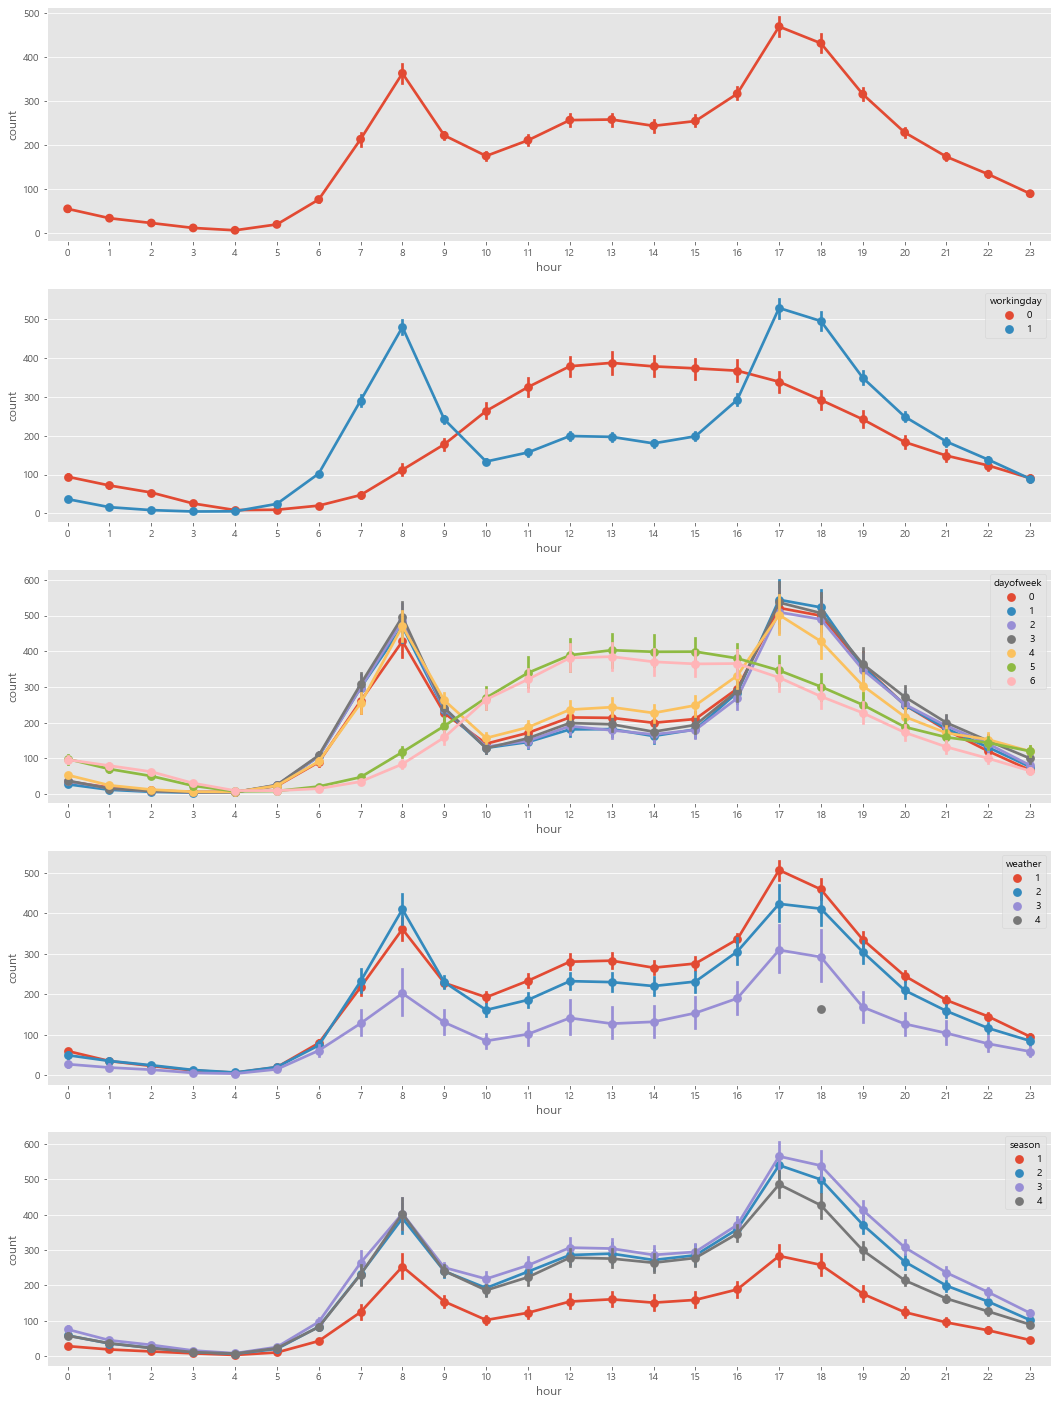

In [13]:
# 포인트플롯
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)
plt.show()

- workingday : 일하는 날에는 출퇴근 시간에 대여량이 많고, 일하지 않는 날에는 점심 시간에 대여량이 많다.
- dayofweek : 주말과 일하지 않는 날의 그래프가 매우 유사하다.
- weather : 1(날이 좋을 때)가 가장 많은 대여량을 보이고, 날이 안 좋아질수록(1->4) 대여량이 낮아진다.
- season : 1(봄)에 가장 적게 빌리고, 나머지 계절은 비슷하다.

In [14]:
# 상관계수 구하기
corrMat = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMat = corrMat.corr()
print(corrMat)

mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


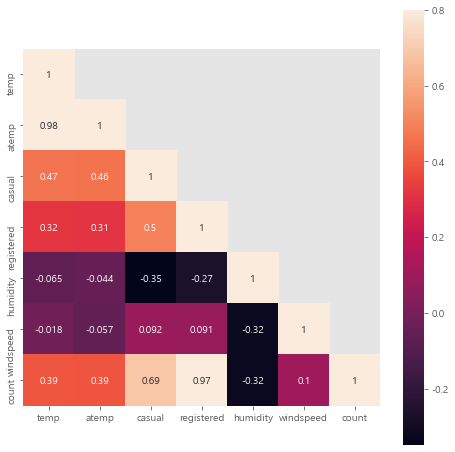

In [15]:
# 상관계수 행렬
plt.figure(figsize = (8,8))
sns.heatmap(corrMat, mask = mask, vmax = 0.8, square = True, annot = True)
plt.show()

- 온도(temp), 습도(humidity), 풍속(windspeed)은 상관관계가 약하다.
- 대여량(count)와 강한 상관관계를 보이는 것은 등록된 대여자(registered)지만 test에는 이 feature가 없다.
- 체감온도(atemp)와 온도(temp)는 0.98로 강한 상관관계가 보이기 때문에, 두 feature 모두를 사용하는건 적절하지 않다.

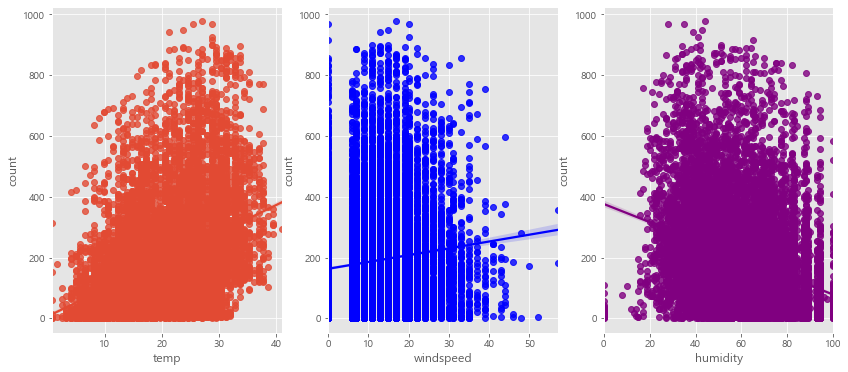

In [16]:
# 상관계수가 약한 온도, 습도, 풍속의 scatter plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(14,6)

sns.regplot(x = 'temp', y= 'count', data = train, ax = ax1)
sns.regplot(x = 'windspeed', y= 'count', data = train, ax = ax2, color = 'blue')
sns.regplot(x = 'humidity', y= 'count', data = train, ax = ax3, color = 'purple')
plt.show()

풍속의 경우, 많은 데이터가 0에 모여있다. 결측치가 0으로 기록되었을 수도 있다. 차후 조정을 한다면 좋은 점수를 받을 것 같다.

In [17]:
# year + month
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

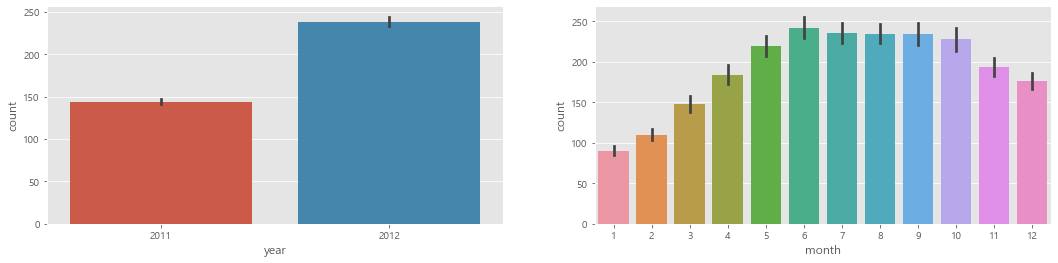

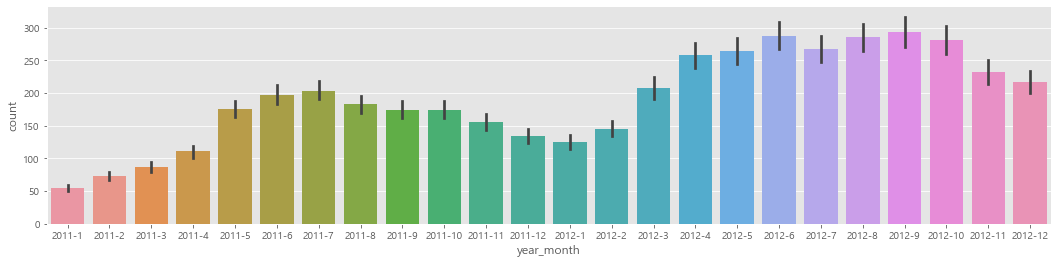

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18,4)

sns.barplot(data = train, x = 'year',  y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols= 1)
fig.set_size_inches(18,4)
sns.barplot(data = train, x = 'year_month', y = 'count', ax  = ax3)

2011년의 월별 데이터와 2012년의 월별 데이터를 보면 전체적으로 증가하는 추세를 보인다.

In [19]:
# 이상치 제거
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3 * train['count'].std())]

print('이상치 제거 전: ',train.shape)
print('이상치 제거 후: ',trainWithoutOutliers.shape)

이상치 제거 전:  (10886, 20)
이상치 제거 후:  (10739, 20)


이상치를 탐색하는 몇가지 방법 중, 위에서는 3 * sigma 방식을 택했다. 그 결과 147개의 행이 삭제되었다.

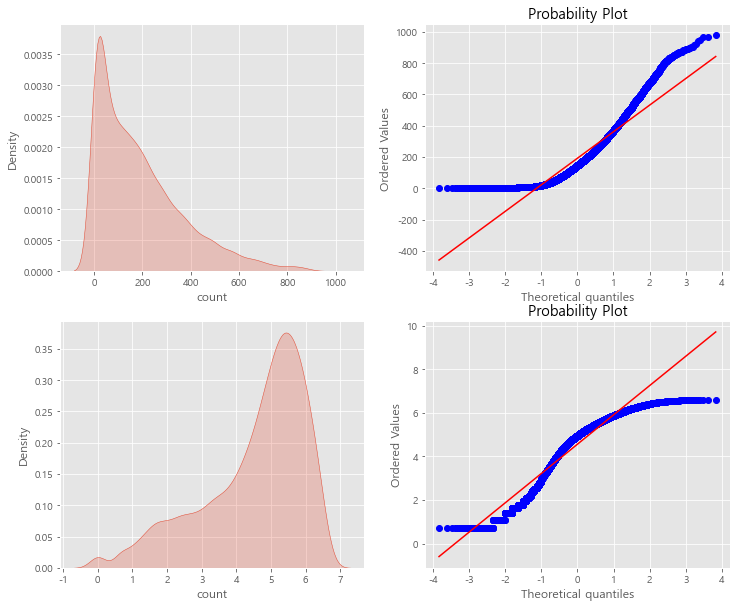

In [20]:
# count 값의 데이터 분포도 파악

figure, axes = plt.subplots(ncols =2, nrows = 2)
figure.set_size_inches(12,10)

sns.kdeplot(train['count'], ax = axes[0][0], fill = True)
stats.probplot(train['count'], dist = 'norm', fit = True, plot = axes[0][1])

sns.kdeplot(np.log(trainWithoutOutliers['count']), ax = axes[1][0], fill = True)
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist = 'norm', fit = True, plot = axes[1][1])
plt.show()

머신러닝 모델에서는 종속변수가 정규분포를 갖는다고 가정하기 때문에, 오른쪽으로 치우져진 count 변수를 outlier를 제거하고, log 변환을 통해 상대적으로 정규분포에 근사하게 만들어준다.

## Feature Engineering

In [21]:
# train 데이터 불러오기
train = pd.read_csv('data/bike_train.csv', parse_dates= ['datetime'])
print('train shape: ',train.shape)
# test 데이터 불러오기
test = pd.read_csv('data/bike_test.csv', parse_dates = ['datetime'])
print('test shape: ',test.shape)

train shape:  (10886, 12)
test shape:  (6493, 9)


In [22]:
# 시간에 대한 파생변수 생성 (train)
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [23]:
# 시간에 따른 파생변수 생성 (test)
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

7개의 파생변수 생성

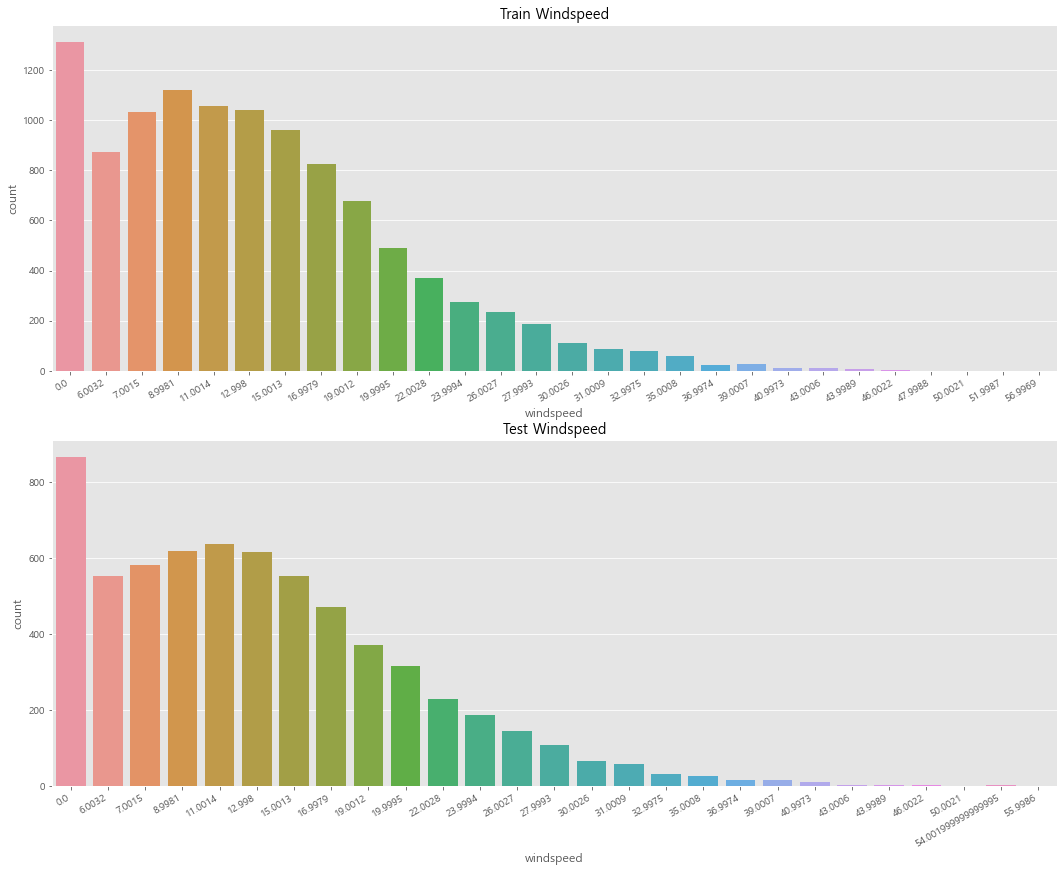

In [24]:
# train, test의 풍속(windspeed) 시각화
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18,14)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right') # ha = horizon align
axes[0].set(ylabel = 'Count', title = 'Train Windspeed')
sns.countplot(data = train, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right') 
axes[1].set(ylabel = 'Count', title = 'Test Windspeed')
sns.countplot(data = test, x = 'windspeed', ax = axes[1])
plt.show()

In [25]:
# train.loc[train['windspeed'] == 0, 'windspeed'] = train['windspeed'].mean()
# test.loc[test['windspeed']] == 1, 'windspeed'] = test['windspeed'].mean()

많은 값들이 0에 모여있다. 따라서 0을 다른 값으로 대체해줘야한다. 이때 평균을 구해 일괄적으로 대체해줄 수 있지만 예측 정확도를 높이는데 도움이 되지는 않을 것 같다.

In [26]:
# 풍속이 0인 데이터세트와 0이 아닌 데이터세트로 나눠줌
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print('풍속이 0인 데이터세트: ', trainWind0.shape)
print('풍속이 0이 아닌 데이터세트: ', trainWindNot0.shape)

풍속이 0인 데이터세트:  (1313, 19)
풍속이 0이 아닌 데이터세트:  (9573, 19)


In [27]:
# RandomForest를 통해 예측값을 대체

from sklearn.ensemble import RandomForestClassifier

def predit_windspeed(data):
    
    # 풍속이 0인 것과 아닌 것을 나눠줌
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 feature 선정
    wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'atemp', 'year']
    
    # 풍속이 0이 아닌 데이터들의 타입을 str으로 바꿔줌
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # 모델 학습 및 예측
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    # 예측값 비교를 위해 df 생성
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 값이 0으로 기록 된 풍속에 대해 예측 값을 넣어줌
    predictWind0['windspeed'] = wind0Values
    
    # 풍속이 0이 아닌 df에 풍속이 0인 df를 합쳐줌
    data = predictWindNot0.append(predictWind0)
    
    # 풍속의 데이터 타입을 float으로 지정
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True, drop = True)
    return data

<AxesSubplot:title={'center':'Train Windspeed'}, xlabel='windspeed', ylabel='count'>

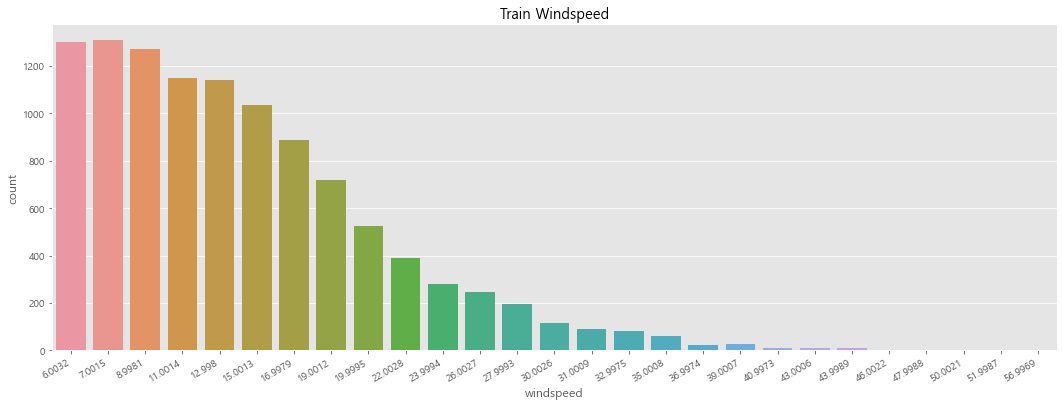

In [28]:
train = predit_windspeed(train)
# test = predict_windspeed(test)

# windspeed의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel = 'Count', title = 'Train Windspeed')
sns.countplot(data = train, x = 'windspeed', ax = ax1)

풍속이 0인 데이터가 다른 값으로 대체되었다.

## Feature Selection

- 신호와 잡음을 구분해야한다.
- feature가 많다고 무조건 좋은 성능을 내지는 않는다!
- feature를 하나씩 추가하고 변경해가면서, 좋지않은 feature는 제거하는 것이 좋다.

In [29]:
categorical_feature_names = ['season', 'holiday', 'workingday', 'weather', 'dayofweek', 'month', 'year', 'hour']

for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [30]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

## Modeling

In [31]:
# train과 test셋으로 분리
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['count']

In [32]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # numpy로 배열 형태로 바꿔줌
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 +1 하고, 로그를 씌워줌
    log_predict = np.log(predicted_values  + 1) 
    log_actual = np.log(actual_values + 1)
    # np.log1p
    
    # 예측값 - 실제값 후, 제곱
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균
    mean_difference = difference.mean()
    
    # 루트
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle = True, random_state = 0)

### RandomForest

In [34]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state = 0)

In [35]:
%time score = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()

# 0에 가까울수록 좋은 모델
print('Score = {0:.5f}'.format(score))

Wall time: 12.3 s
Score = 0.33067


In [36]:
# cross_val_score는 평가만 반환하므로 예측을 위해선 재학습이 필요함
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(prediction.shape)

(6493,)


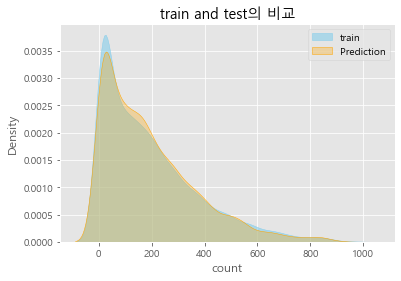

In [37]:
g= sns.kdeplot(y_train, color = 'skyblue', alpha = .6, fill = True, label  = 'train')
g= sns.kdeplot(prediction, color = 'orange', alpha = .3, fill = True, label = 'Prediction')
plt.title('train and test의 비교')
plt.legend()
plt.show()

## Reference

오늘의 코드(youtube) : https://youtu.be/g7EwIFXJntc